In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
steam_df = pd.read_csv("steam_df.csv", index_col=0)

### 1 Feature Selection

In [3]:
test_len = int(len(steam_df)*0.25)
train_len = len(steam_df) - test_len

In [7]:
train_df = steam_df.iloc[0:train_len]
test_df = steam_df.iloc[train_len:]

### 2 Hyperparameter Optimization

In [17]:
all_features = train_df.columns.drop('ResponseName','PriceFinal').tolist()
mse_values = []
hyper_params = range(1,21)

In [18]:
for k in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=k, algorithm='brute', metric='euclidean')
    knn.fit(train_df[all_features], train_df['PriceFinal'])
    predictions = knn.predict(test_df[all_features])
    mse = mean_squared_error(predictions,test_df.PriceFinal)
    mse_values.append(mse)

In [19]:
df = pd.DataFrame(
    {'hyper_params': hyper_params,
     'mse_values': mse_values
    })

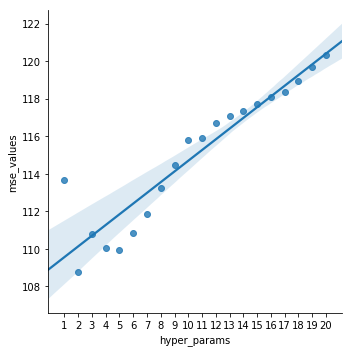

In [20]:
sns.lmplot(x='hyper_params', y='mse_values', data=df)

plt.xticks(range(1,21))

plt.show()

### 3 Cross Validation

In [37]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [40]:
X = steam_df.columns.drop("ResponseName")
y = "PriceFinal"

In [42]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

#num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23, 25, 27, 30]
num_folds = [25, 27, 29, 31, 33, 35, 37]

for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, steam_df[X],
                           steam_df[y], scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmse = np.mean(rmses)
    std_rmse = np.std(rmses)
    print(str(fold), "folds: ", "avg RMSE: ", str(avg_rmse), "std RMSE: ", str(std_rmse))

25 folds:  avg RMSE:  9.56237449758 std RMSE:  2.65187078043
27 folds:  avg RMSE:  9.54091023702 std RMSE:  2.64882386247
29 folds:  avg RMSE:  9.57065294408 std RMSE:  2.65579405298
31 folds:  avg RMSE:  9.51168514327 std RMSE:  2.82548889866
33 folds:  avg RMSE:  9.51819906499 std RMSE:  2.85996285823
35 folds:  avg RMSE:  9.48713285304 std RMSE:  2.93125576689
37 folds:  avg RMSE:  9.49870925791 std RMSE:  2.89078440468


Index(['ReleaseDate', 'RequiredAge', 'DLCCount', 'Metacritic', 'MovieCount',
       'RecommendationCount', 'ScreenshotCount', 'SteamSpyOwners',
       'SteamSpyPlayersEstimate', 'PriceFinal', 'GenreScore', 'PlatformScore',
       'CategoryScore'],
      dtype='object')

In [29]:
X

Index(['Unnamed: 0', 'ReleaseDate', 'RequiredAge', 'DLCCount', 'Metacritic',
       'MovieCount', 'RecommendationCount', 'ScreenshotCount',
       'SteamSpyOwners', 'SteamSpyPlayersEstimate', 'PriceFinal', 'GenreScore',
       'PlatformScore', 'CategoryScore'],
      dtype='object')